"Retail Seasonal Sales Comparison

● From: Minor 1 – EDA

 ● Extension: Compare seasonal sales patterns

 ● Add-ons: Line plots, summary stats

 ● Difficulty: Medium"

In [4]:
#data upload
from google.colab  import files
uploaded= files.upload()
print("uploaded")

Saving store_sales.csv to store_sales.csv
uploaded


Seasonal Sales Summary:
              mean  median        std     min     max  count
season                                                      
Autumn  233.069857  231.23  25.948203  169.85  340.73   1820
Spring  225.168598  223.57  26.435680  165.72  322.72   1840
Summer  229.512027  228.07  26.162747  171.46  323.64   1840
Winter  225.984933  224.54  27.231636  160.71  328.26   1800


/tmp/ipython-input-2486971449.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='season', y='sales', palette='magma',


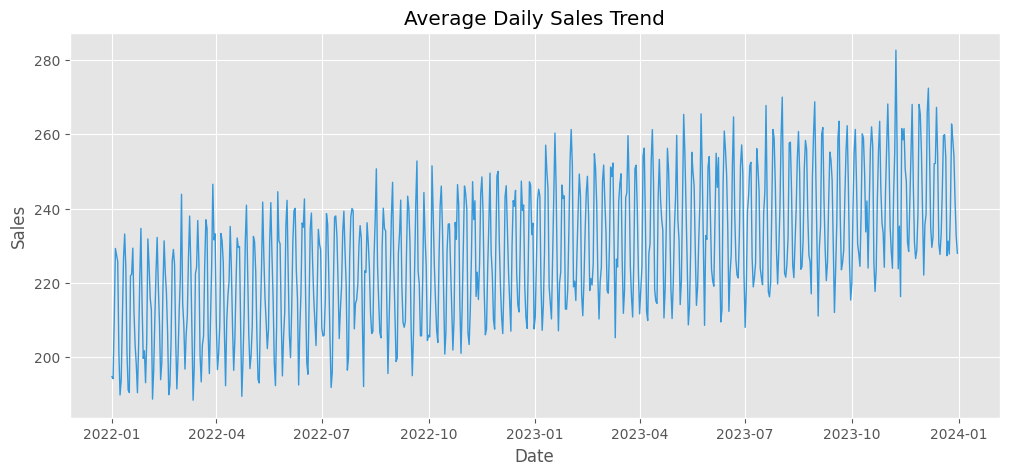

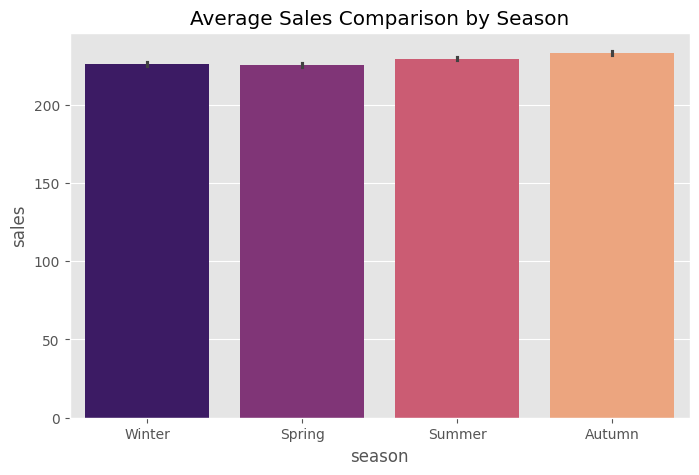

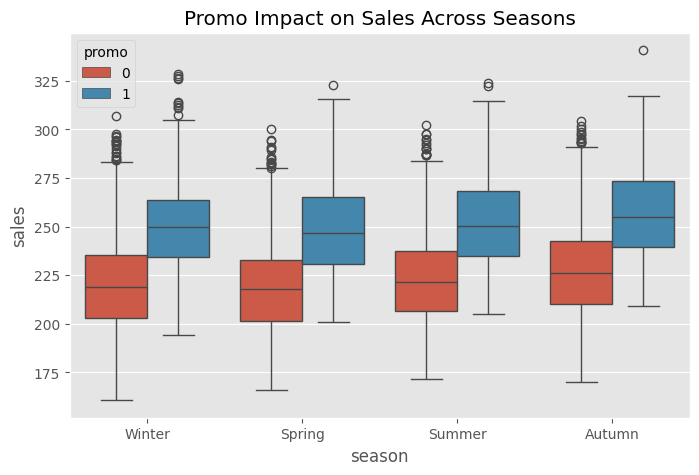

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('store_sales.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# 2. Define Seasonal Logic
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df['season'] = df['month'].apply(get_season)

# 3. Exploratory Data Analysis (EDA)
# Summary Statistics by Season
seasonal_summary = df.groupby('season')['sales'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print("Seasonal Sales Summary:")
print(seasonal_summary)

# 4. Visualizations
plt.style.use('ggplot')

# Plot 1: Sales Trend Over Time
daily_sales = df.groupby('date')['sales'].mean().reset_index()
plt.figure(figsize=(12, 5))
plt.plot(daily_sales['date'], daily_sales['sales'], color='#3498db', linewidth=1)
plt.title('Average Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('sales_trend.png')

# Plot 2: Average Sales by Season
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='season', y='sales', palette='magma',
            order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Average Sales Comparison by Season')
plt.savefig('seasonal_comparison.png')

# Plot 3: Impact of Promotions
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='season', y='sales', hue='promo',
            order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Promo Impact on Sales Across Seasons')
plt.savefig('promo_impact.png')

# Export results
seasonal_summary.to_csv('retail_seasonal_analysis.csv')